In [250]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family']="Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("./대기오염물질_데이터셋.csv", encoding="UTF-8")

df.head()

,datetime,region,no2,co,so2,o3,temperature,wind_direction,wind_speed,precipitation,humidity,id,pm10,pm25,diesel,electric,gasoline
0,2017-01-01 01:00:00,강남구,0.040,0.8,0.005,0.002,1.4,69.1,1.3,0.0,78.0,1590571,63.0,48.0,1112698,1589,1600398
1,2017-01-01 01:00:00,강동구,0.042,0.9,0.004,0.002,-0.2,358.9,1.3,0.0,88.0,1590572,68.0,53.0,1112698,1589,1600398
2,2017-01-01 01:00:00,강북구,0.046,1.2,0.004,0.001,1.4,338.8,0.5,0.0,81.0,1590573,63.0,51.0,1112698,1589,1600398
3,2017-01-01 01:00:00,강서구,0.070,1.3,0.007,0.002,2.9,116.9,1.8,0.0,NaN,1590574,107.0,65.0,1112698,1589,1600398
4,2017-01-01 01:00:00,관악구,0.075,1.5,0.006,0.004,1.1,178.2,1.8,0.0,93.0,1590575,75.0,57.0,1112698,1589,1600398


In [251]:
df = df[['datetime', 'region', 'co', 'so2', 'no2', 'o3']]

df.head()

,datetime,region,co,so2,no2,o3
0,2017-01-01 01:00:00,강남구,0.8,0.005,0.040,0.002
1,2017-01-01 01:00:00,강동구,0.9,0.004,0.042,0.002
2,2017-01-01 01:00:00,강북구,1.2,0.004,0.046,0.001
3,2017-01-01 01:00:00,강서구,1.3,0.007,0.070,0.002
4,2017-01-01 01:00:00,관악구,1.5,0.006,0.075,0.004


In [252]:
df['region'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [253]:
target_regions = ['강남구', '강동구', '강북구', '강서구', '용산구']

df=df[df['region'].isin(target_regions)]

In [254]:
df

,datetime,region,co,so2,no2,o3
0,2017-01-01 01:00:00,강남구,0.8,0.005,0.040,0.002
1,2017-01-01 01:00:00,강동구,0.9,0.004,0.042,0.002
2,2017-01-01 01:00:00,강북구,1.2,0.004,0.046,0.001
3,2017-01-01 01:00:00,강서구,1.3,0.007,0.070,0.002
20,2017-01-01 01:00:00,용산구,1.4,0.005,0.039,0.002
...,...,...,...,...,...,...
1401600,2023-12-31 00:00:00,강남구,0.5,0.003,0.027,0.016
1401601,2023-12-31 00:00:00,강동구,0.8,0.002,0.040,0.011
1401602,2023-12-31 00:00:00,강북구,0.6,0.002,0.022,0.019
1401603,2023-12-31 00:00:00,강서구,0.6,0.003,0.032,0.014


In [255]:
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(df['co'], model='additive', period=8760)


=== 강남구 ===


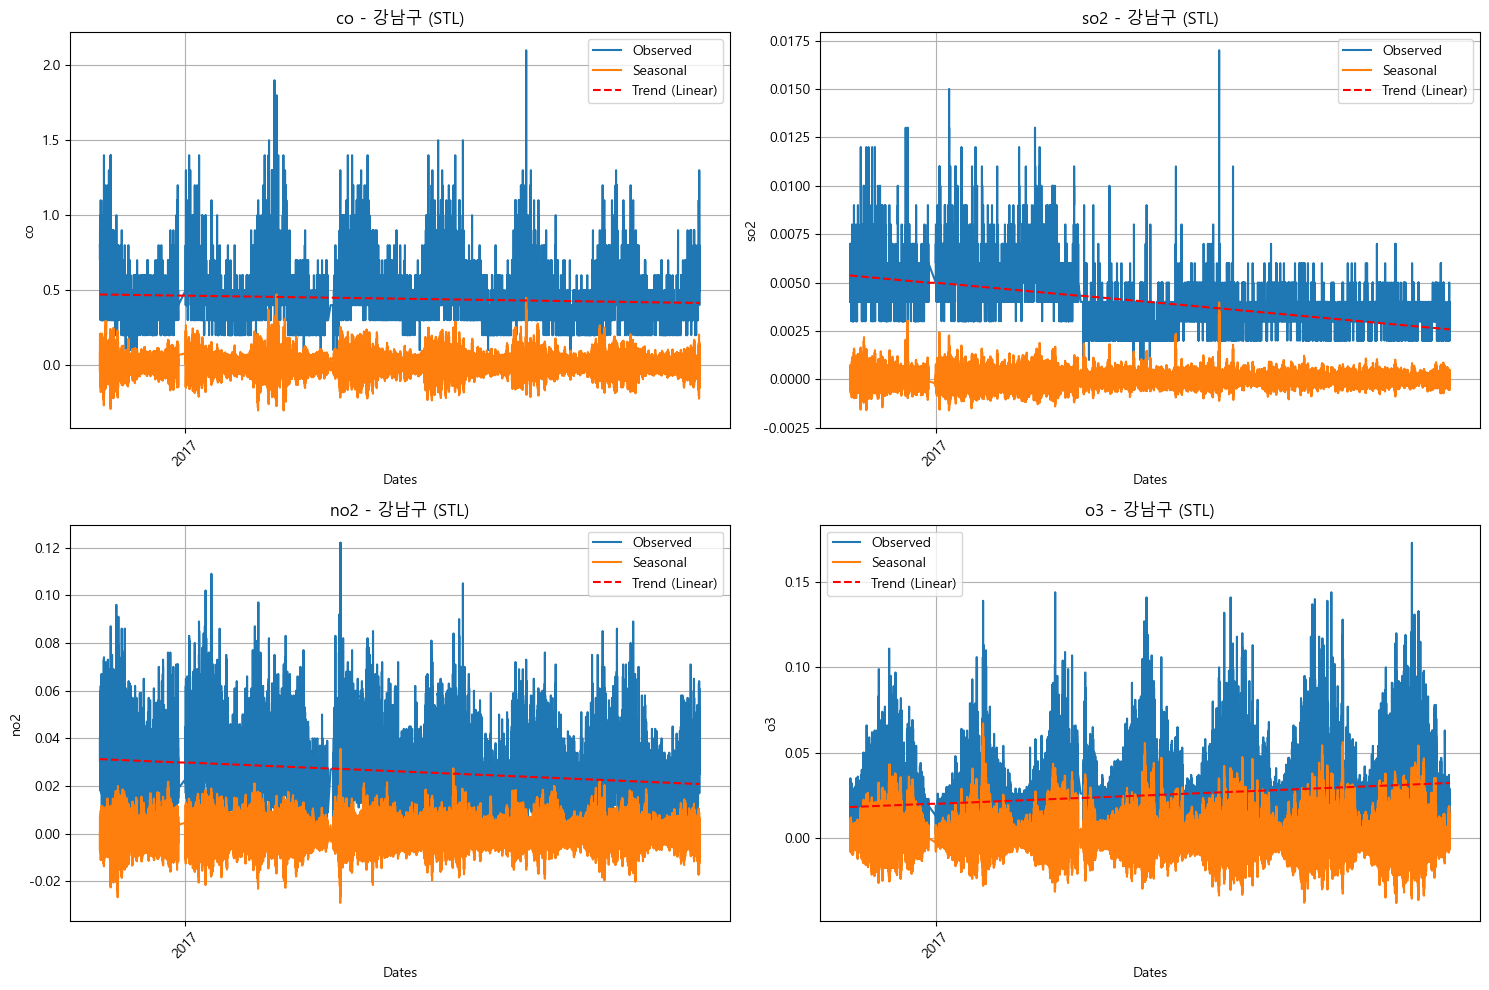

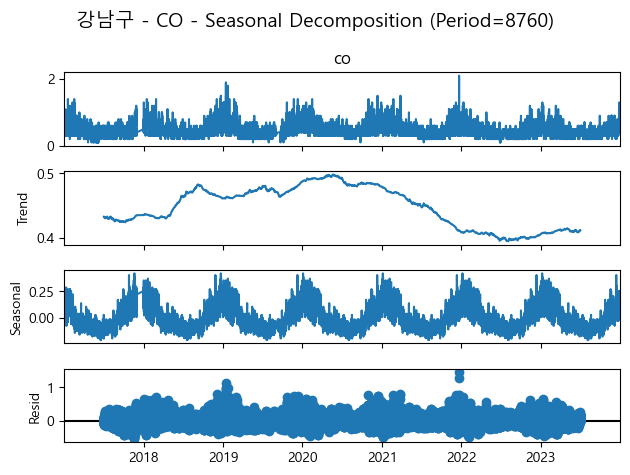

[강남구 - co] ACF/PACF 분석


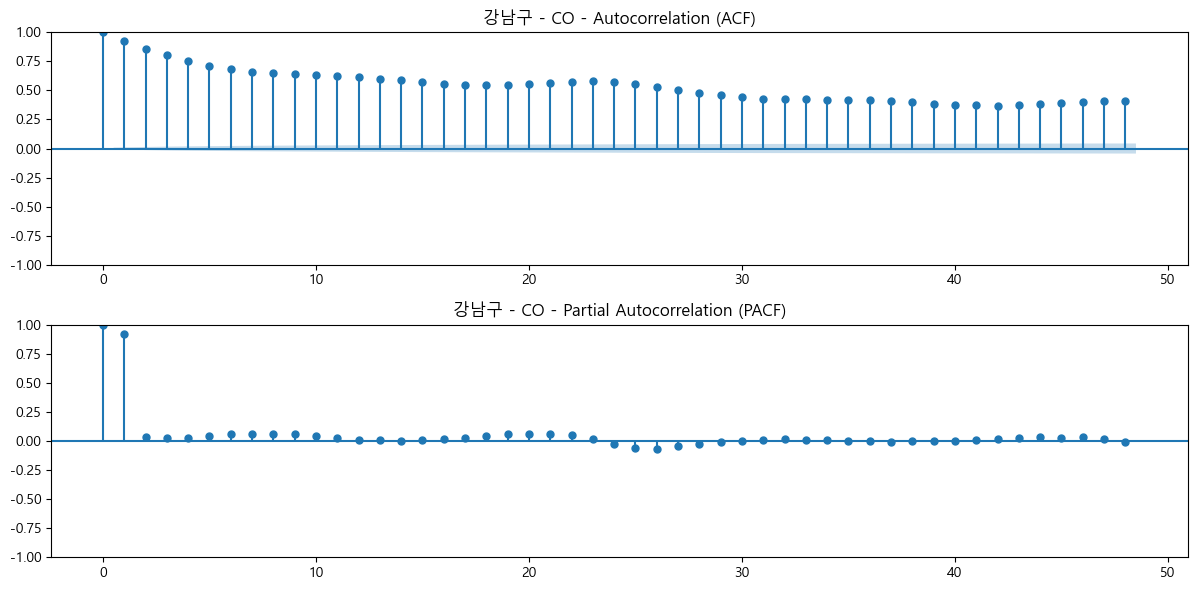

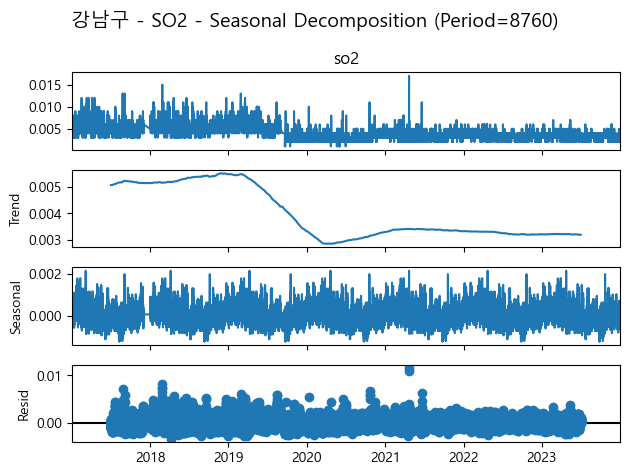

[강남구 - so2] ACF/PACF 분석


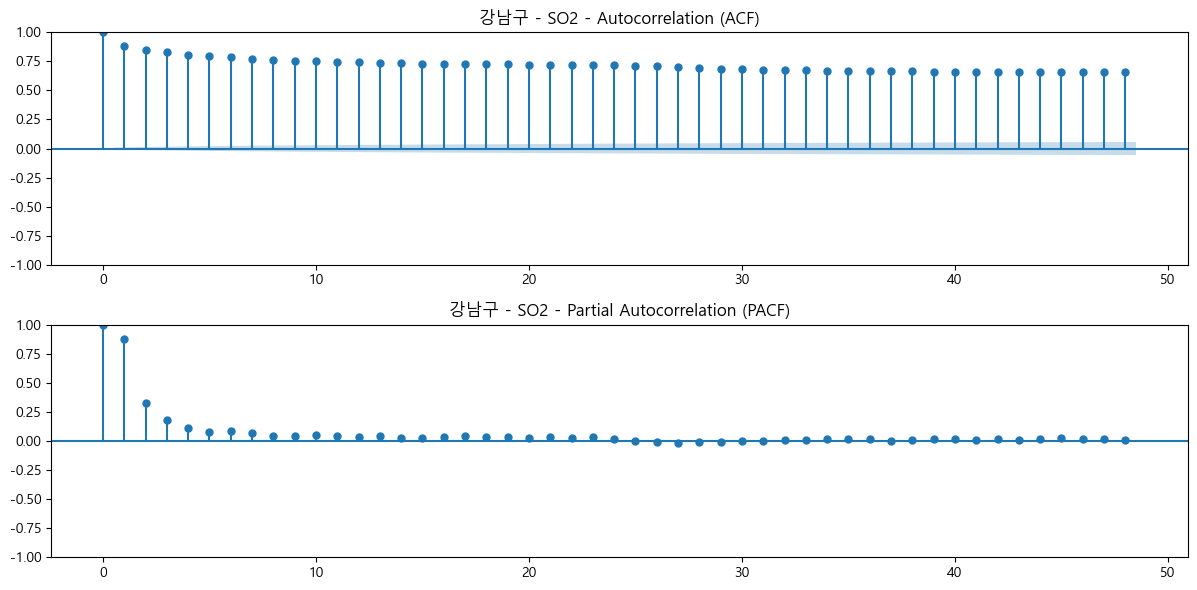

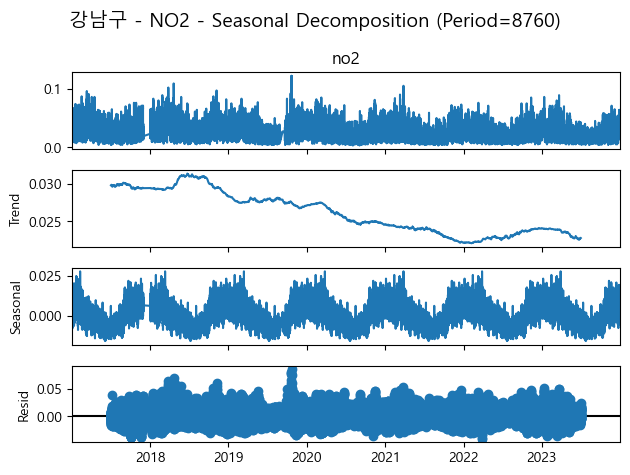

[강남구 - no2] ACF/PACF 분석


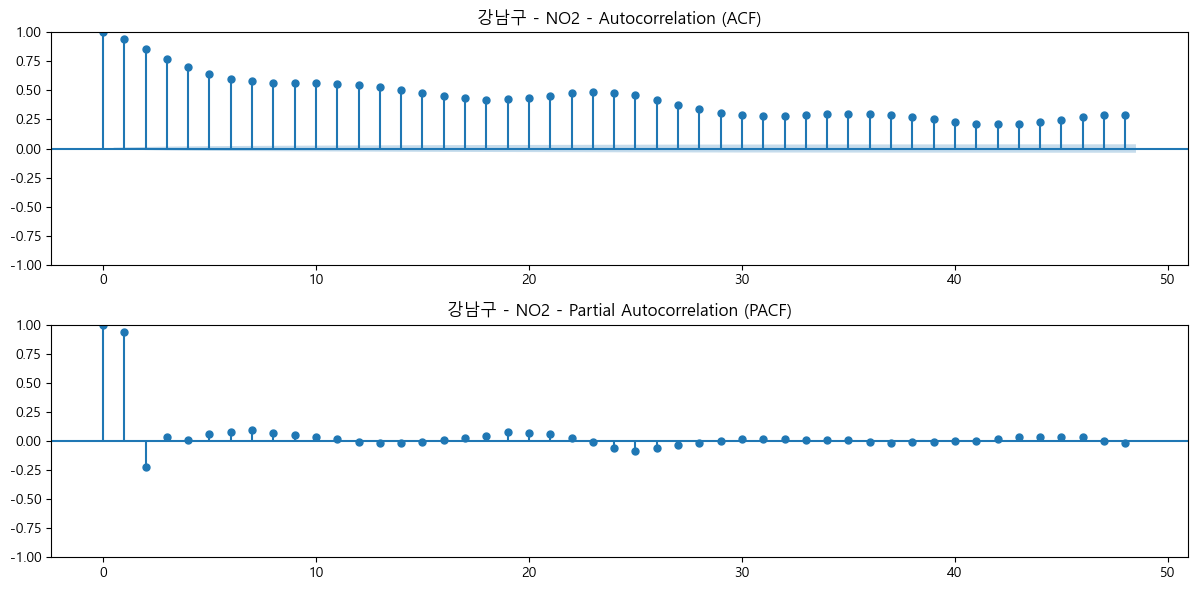

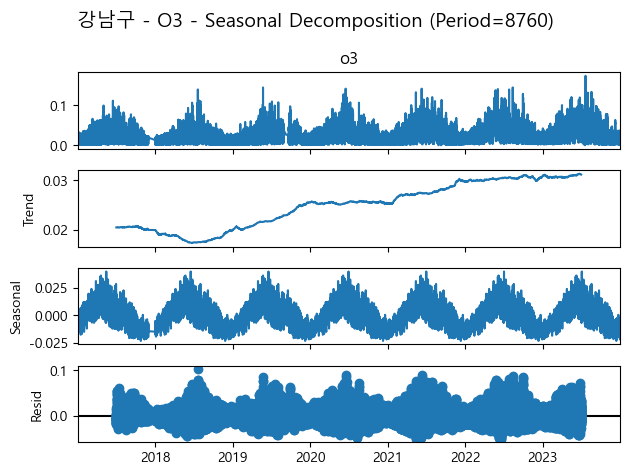

[강남구 - o3] ACF/PACF 분석


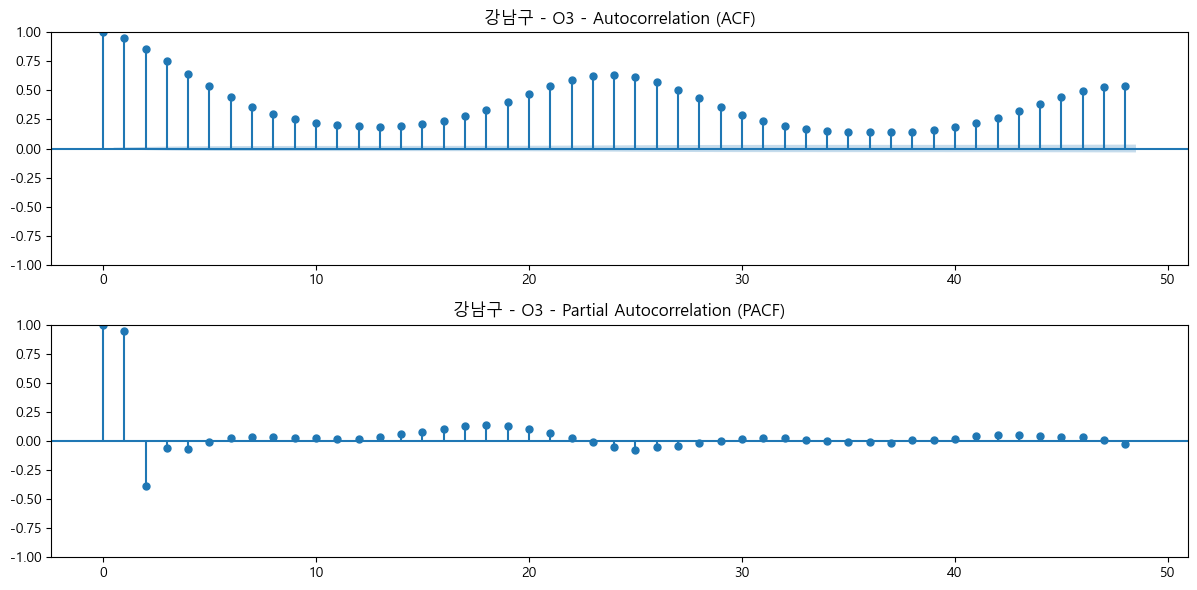


=== 강서구 ===


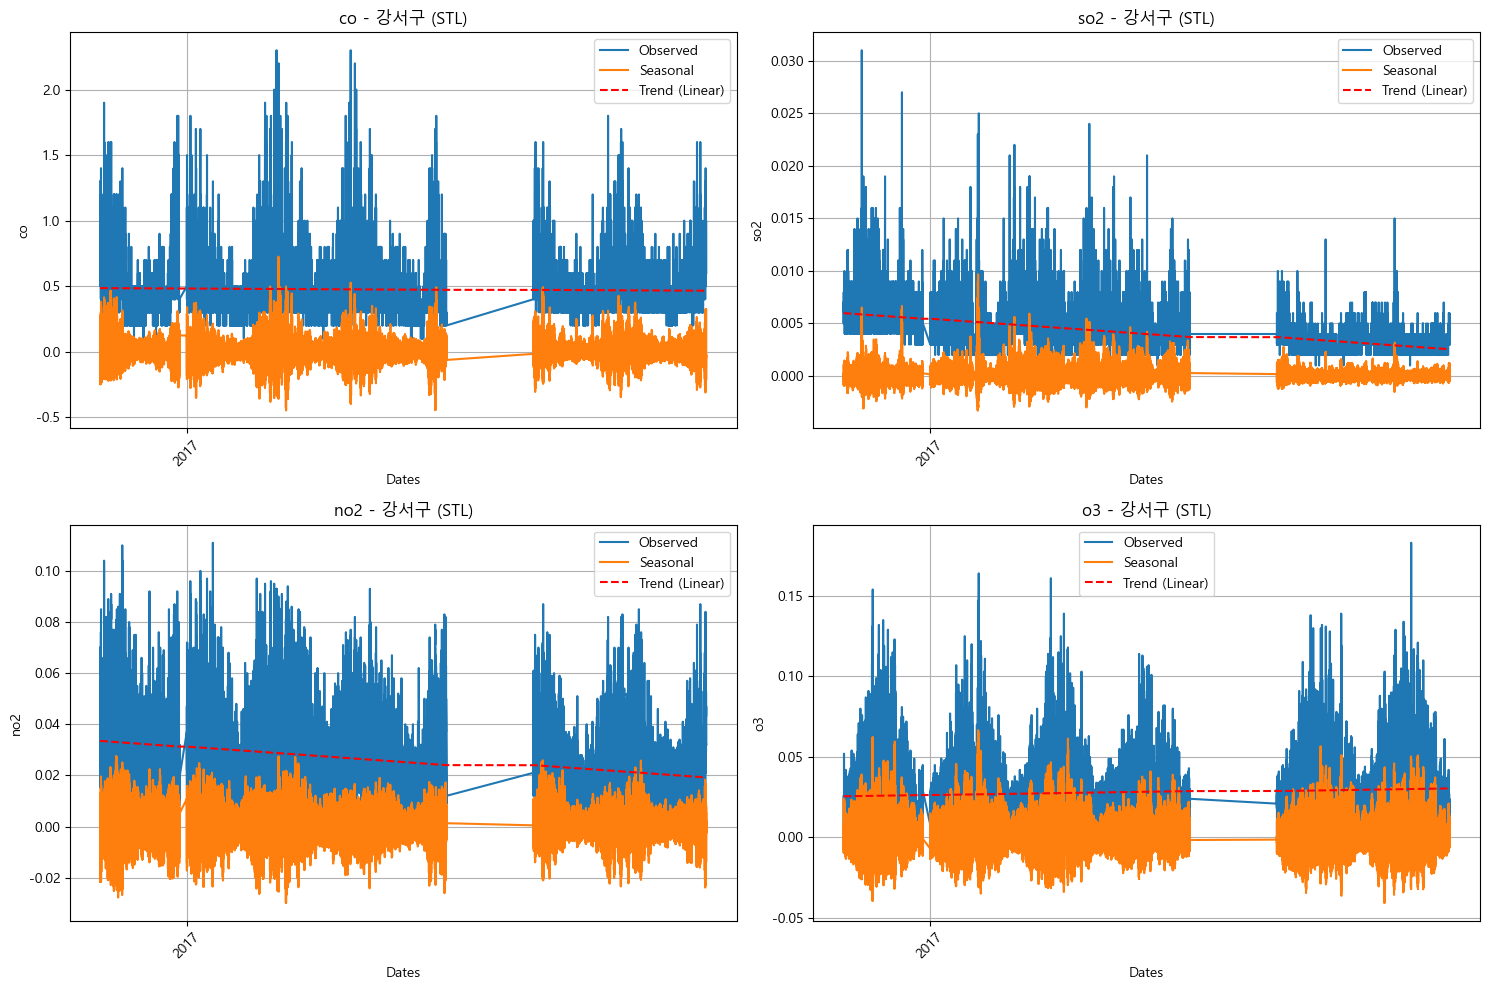

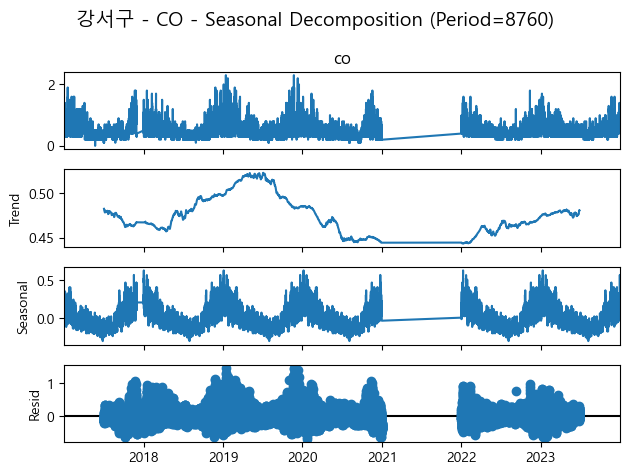

[강서구 - co] ACF/PACF 분석


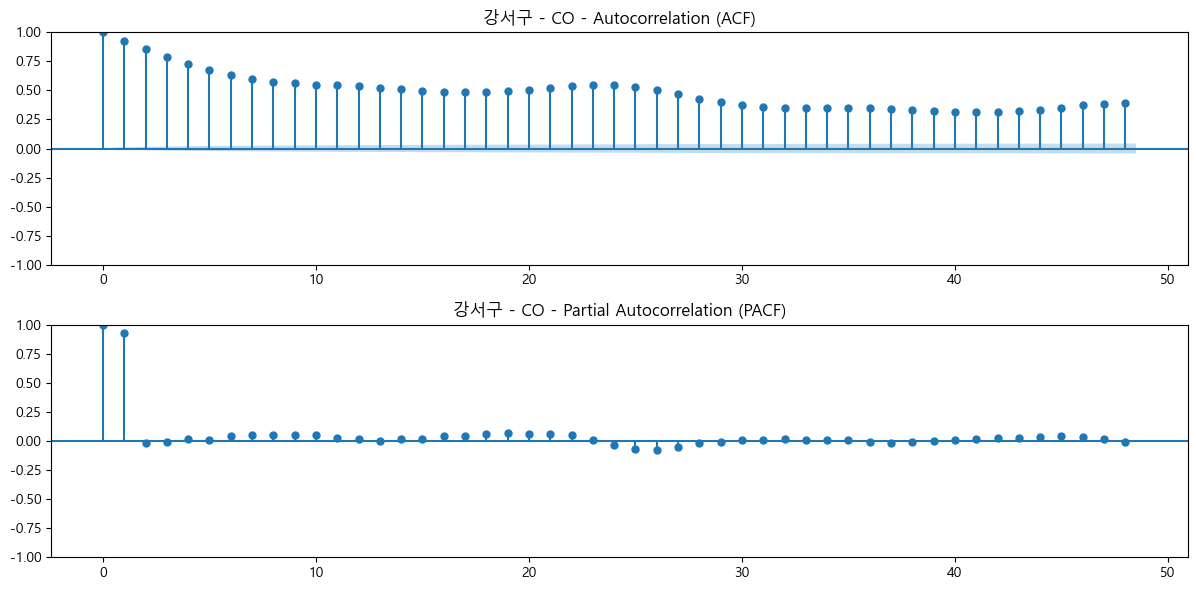

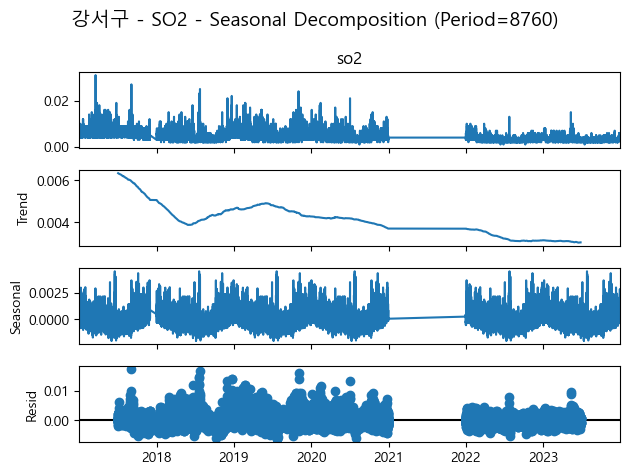

[강서구 - so2] ACF/PACF 분석


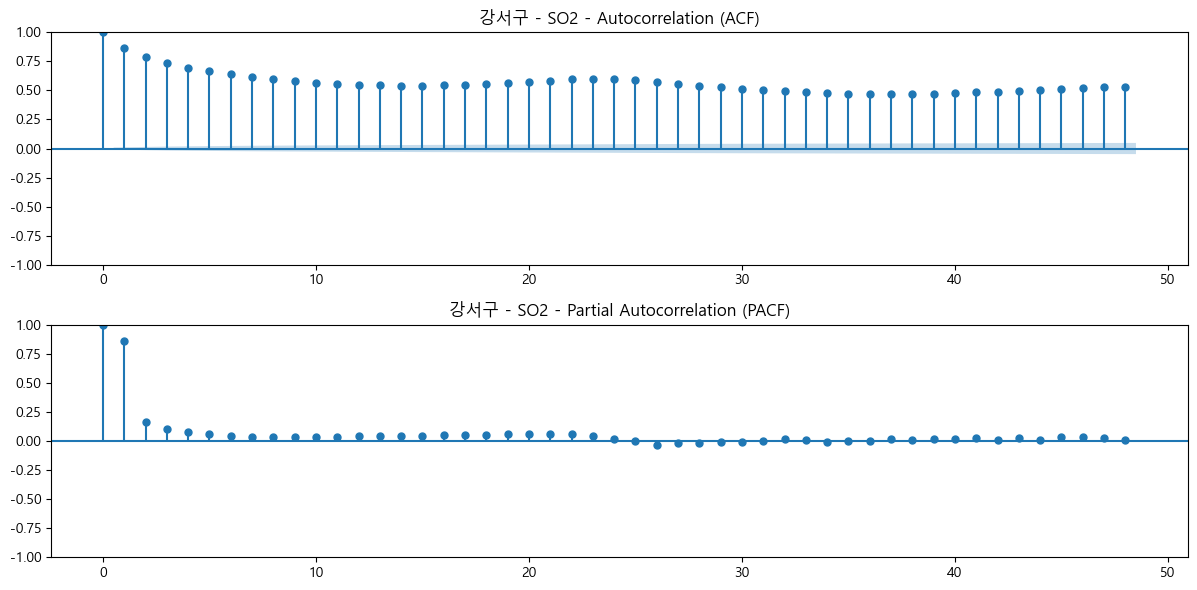

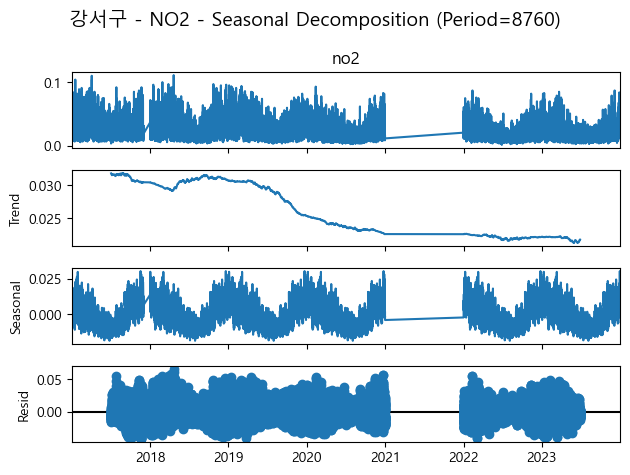

[강서구 - no2] ACF/PACF 분석


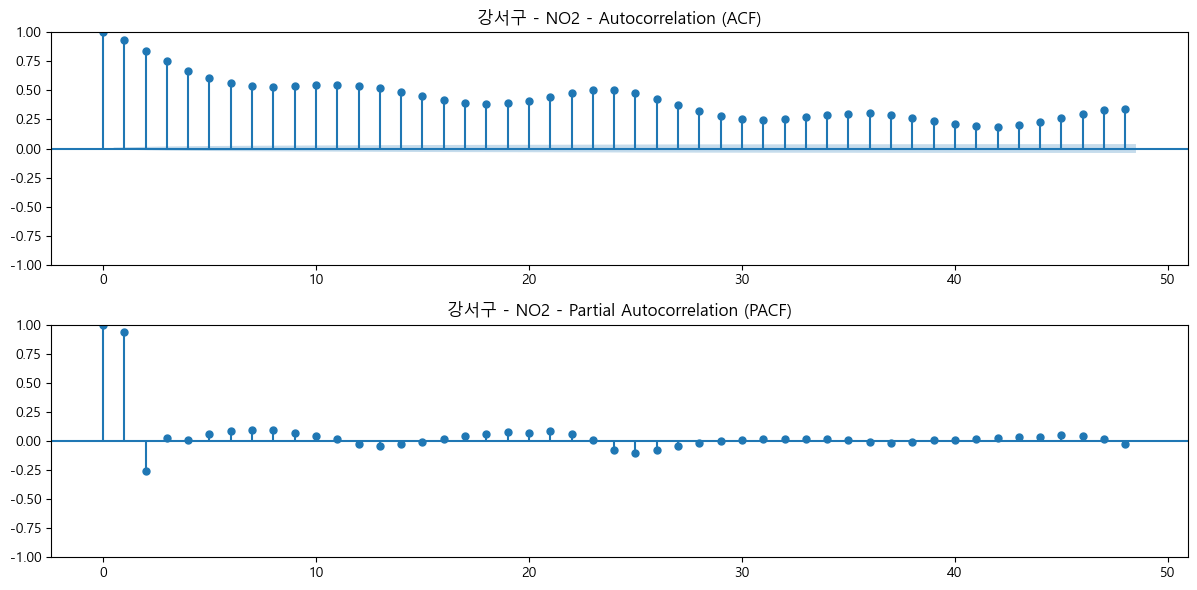

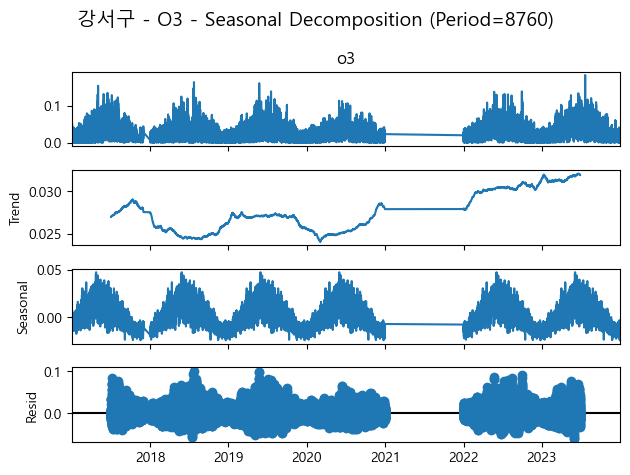

[강서구 - o3] ACF/PACF 분석


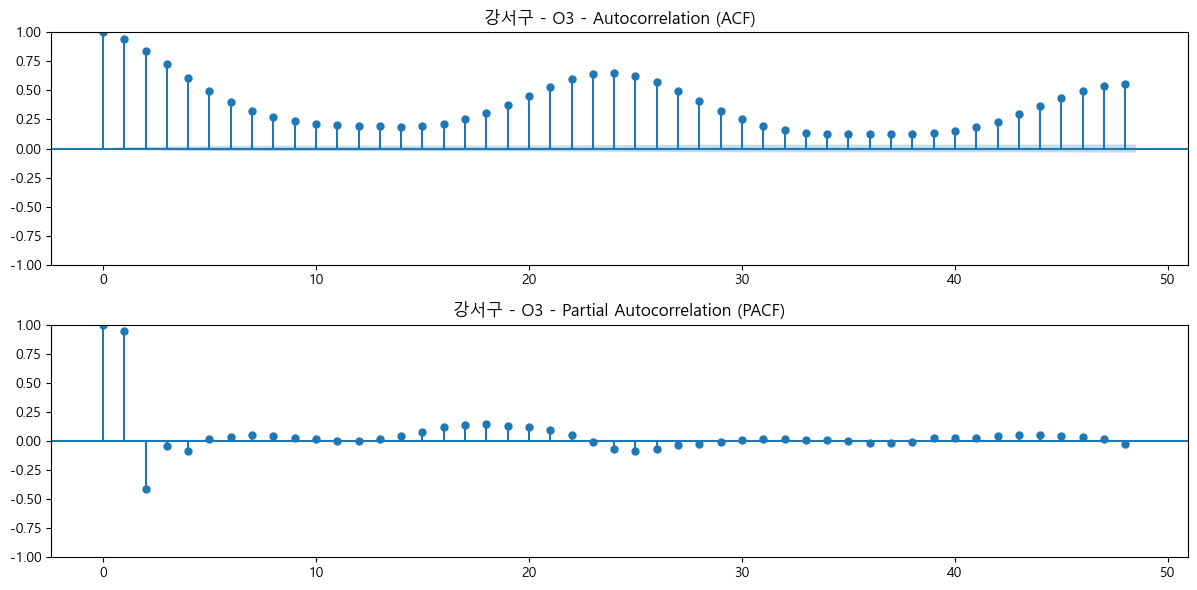


=== 강동구 ===


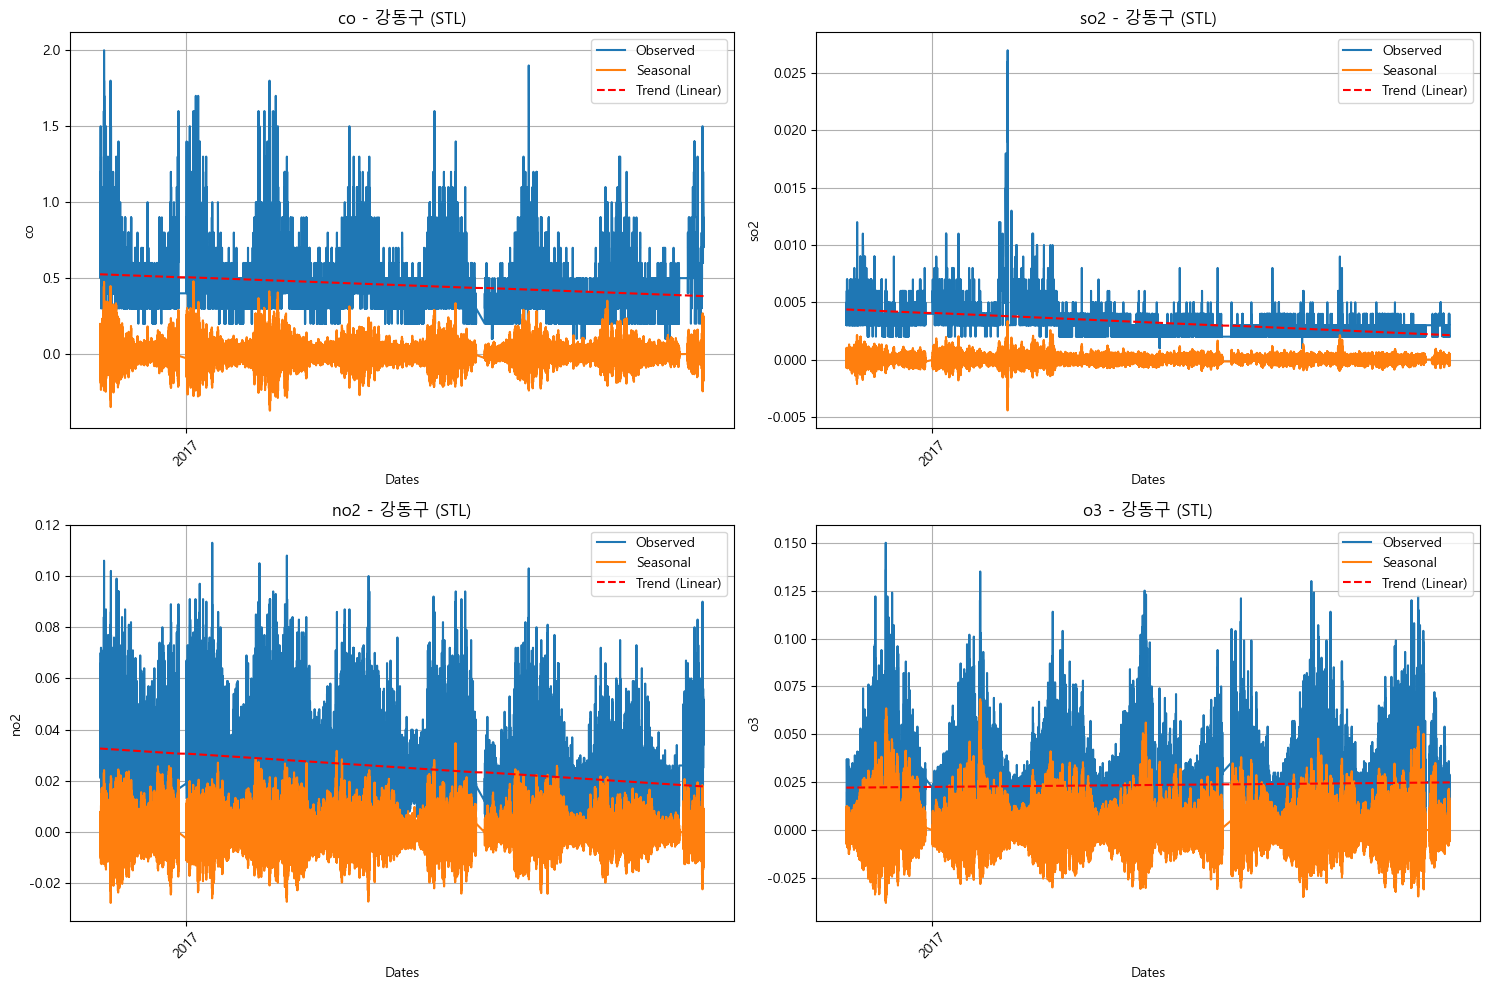

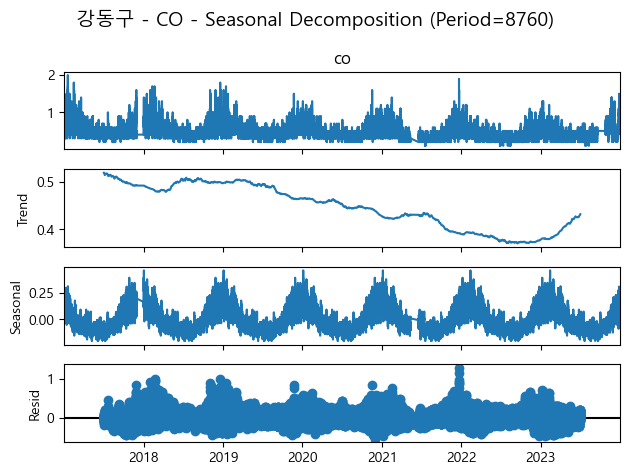

[강동구 - co] ACF/PACF 분석


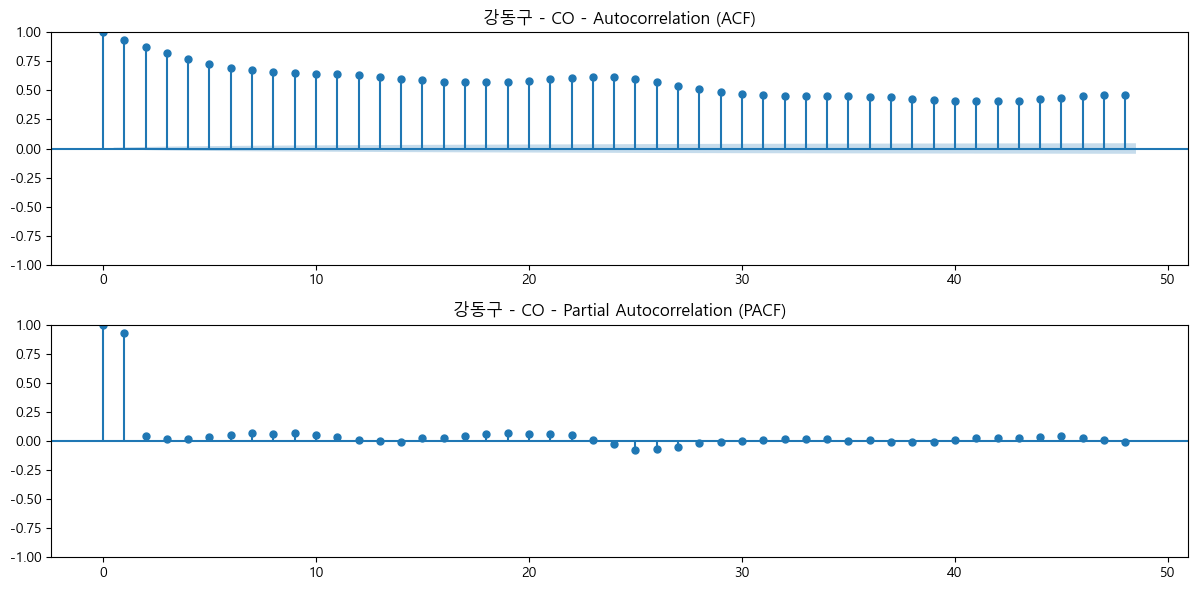

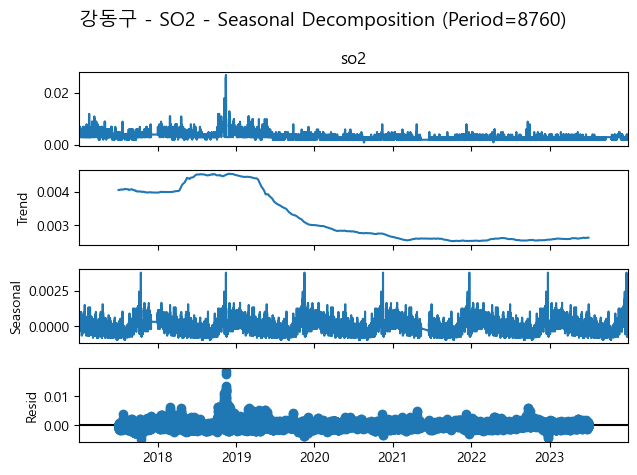

[강동구 - so2] ACF/PACF 분석


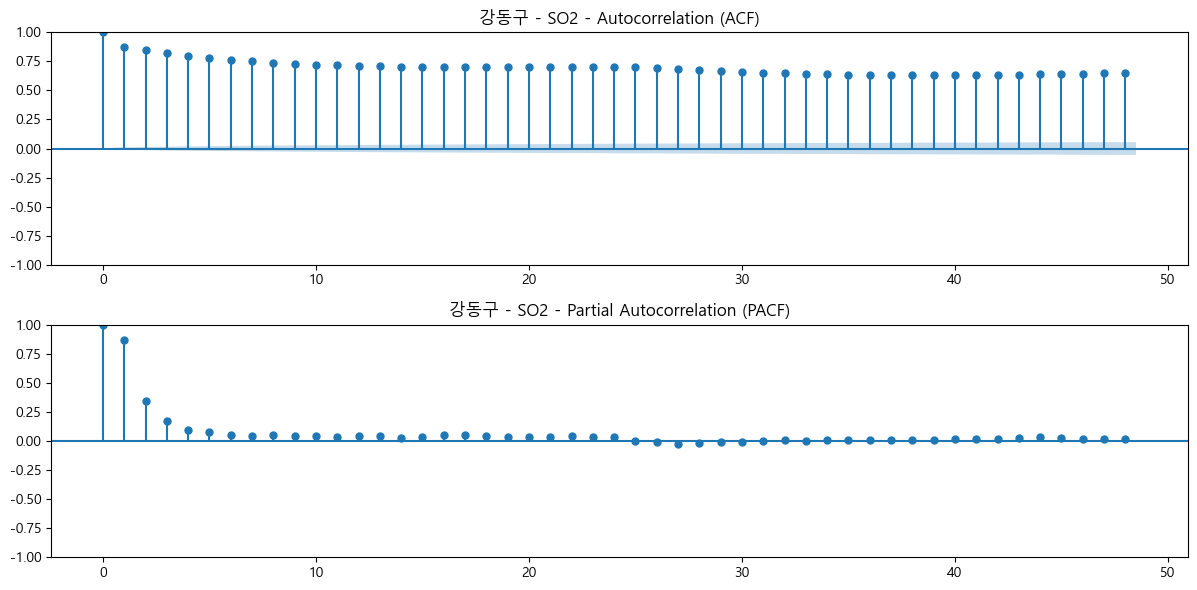

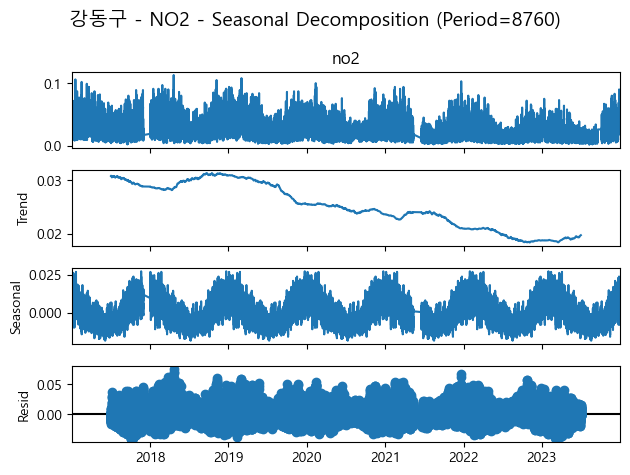

[강동구 - no2] ACF/PACF 분석


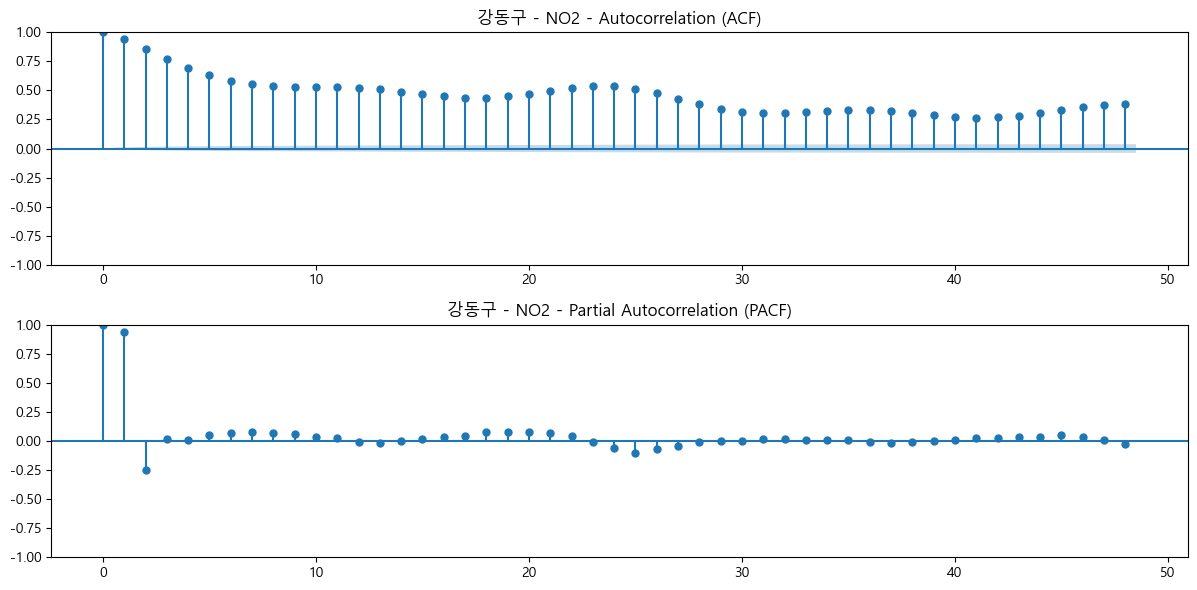

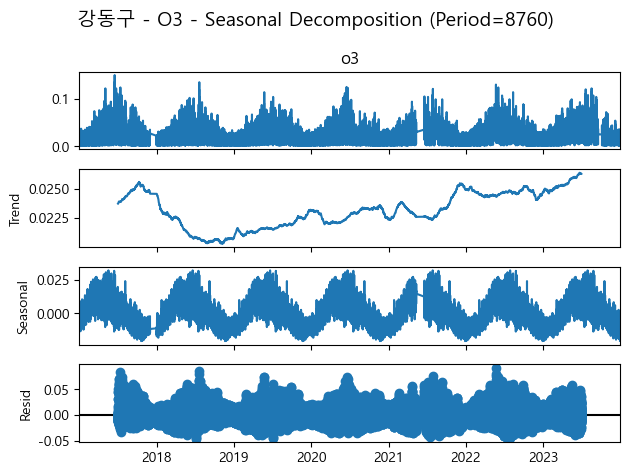

[강동구 - o3] ACF/PACF 분석


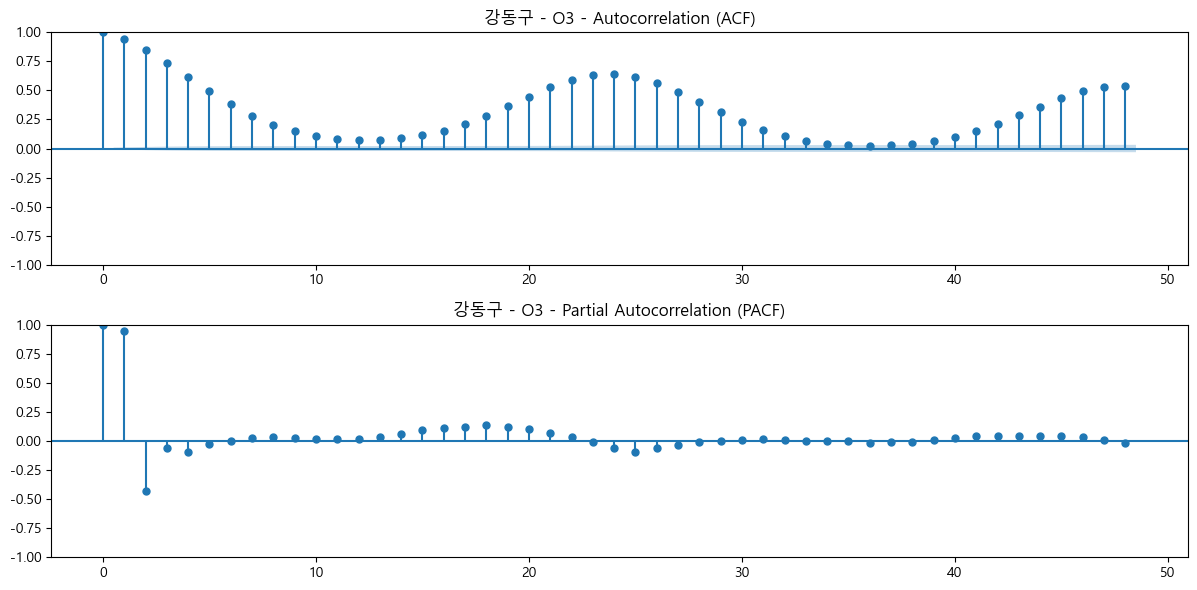


=== 강북구 ===


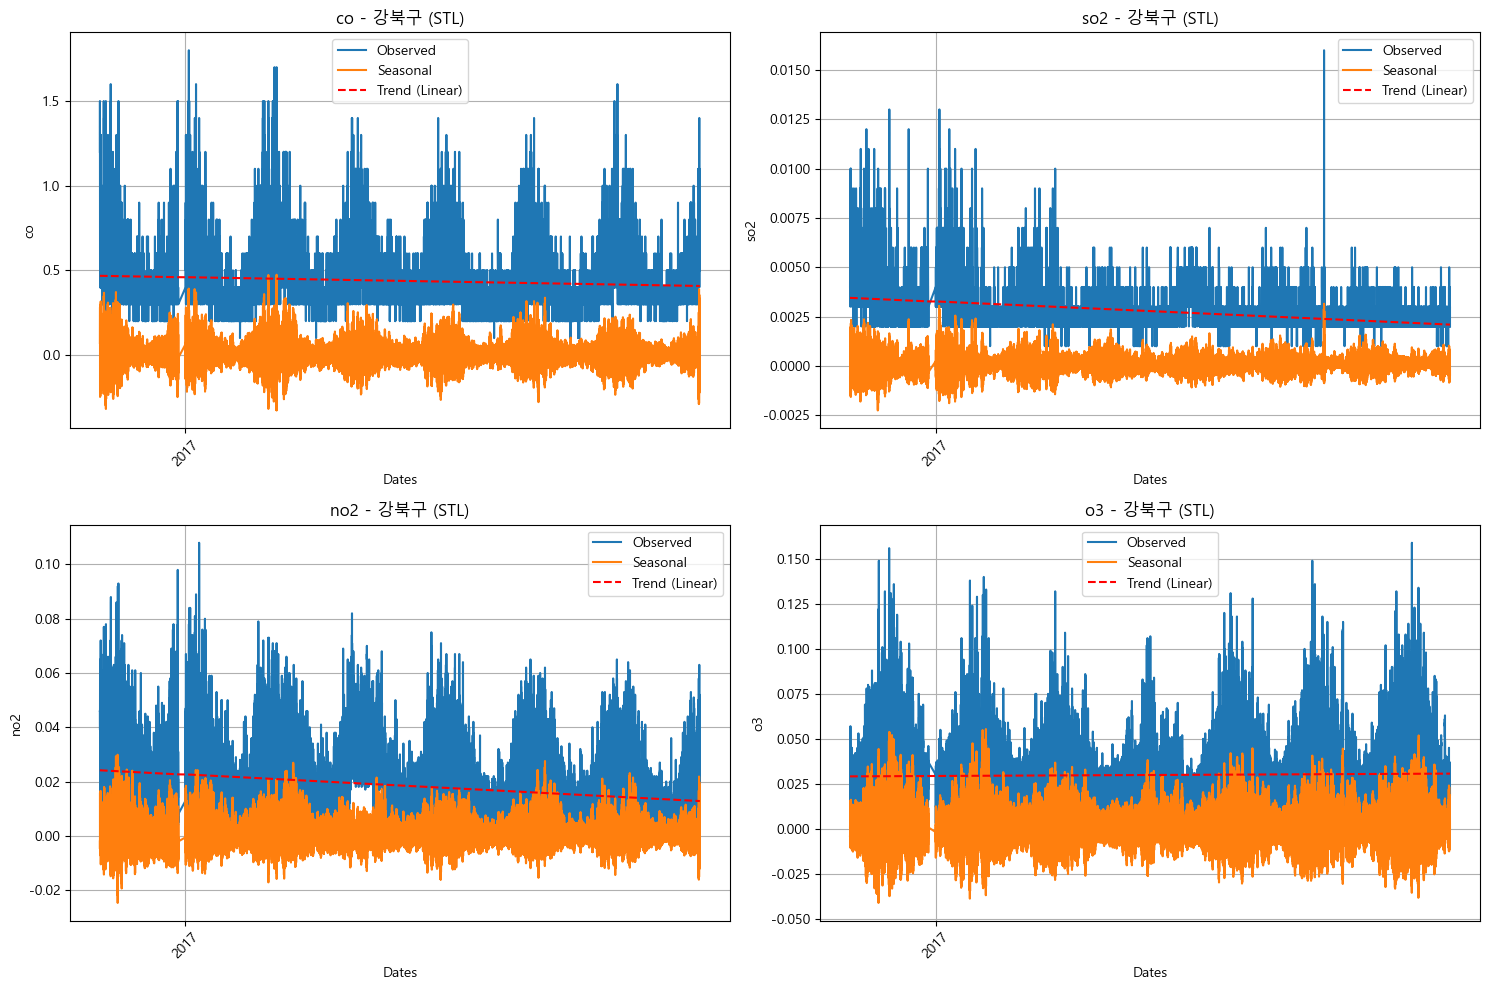

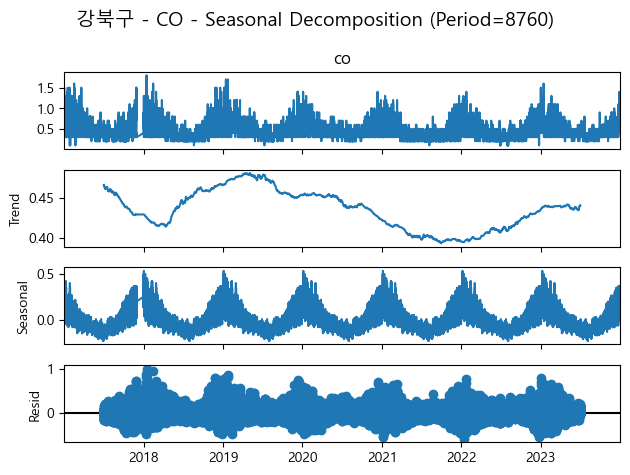

[강북구 - co] ACF/PACF 분석


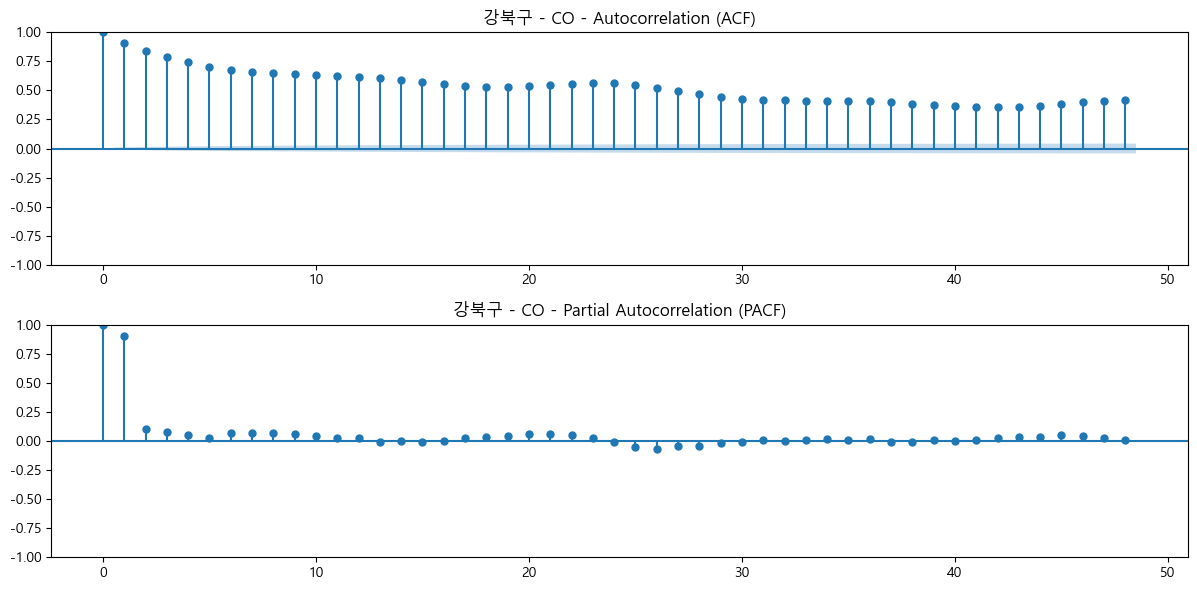

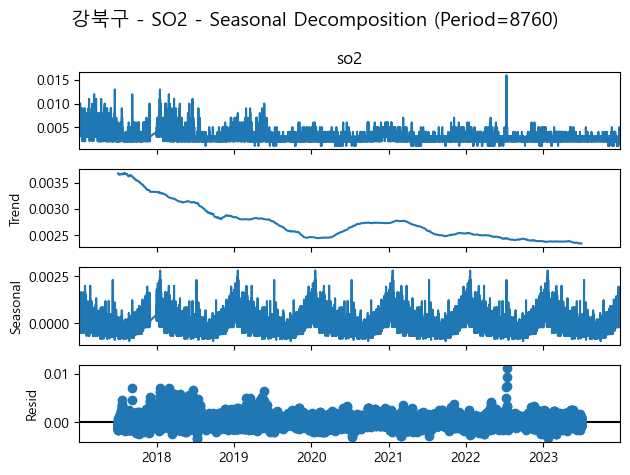

[강북구 - so2] ACF/PACF 분석


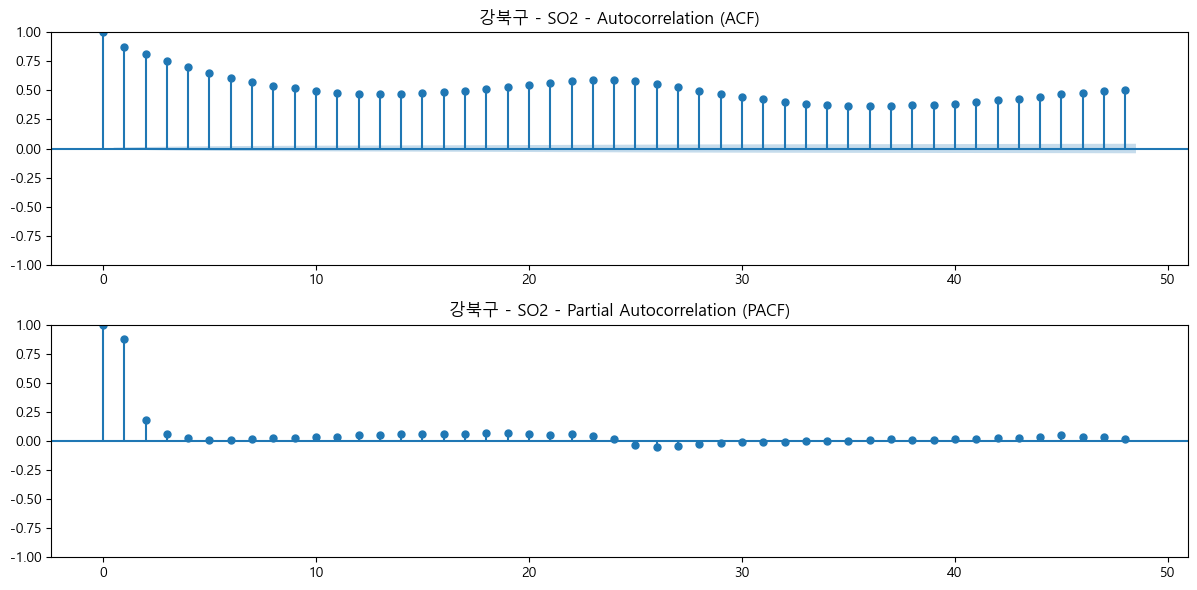

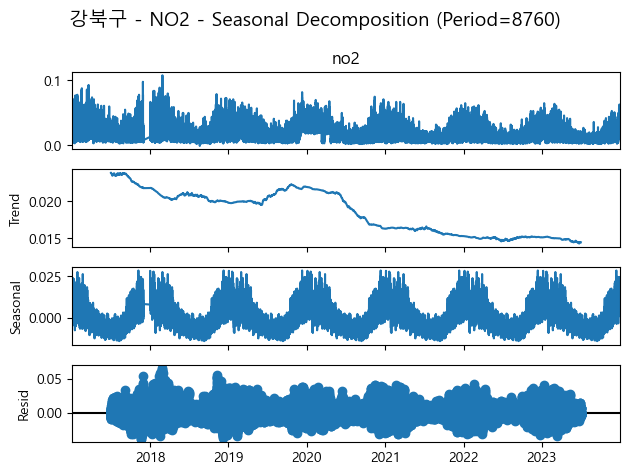

[강북구 - no2] ACF/PACF 분석


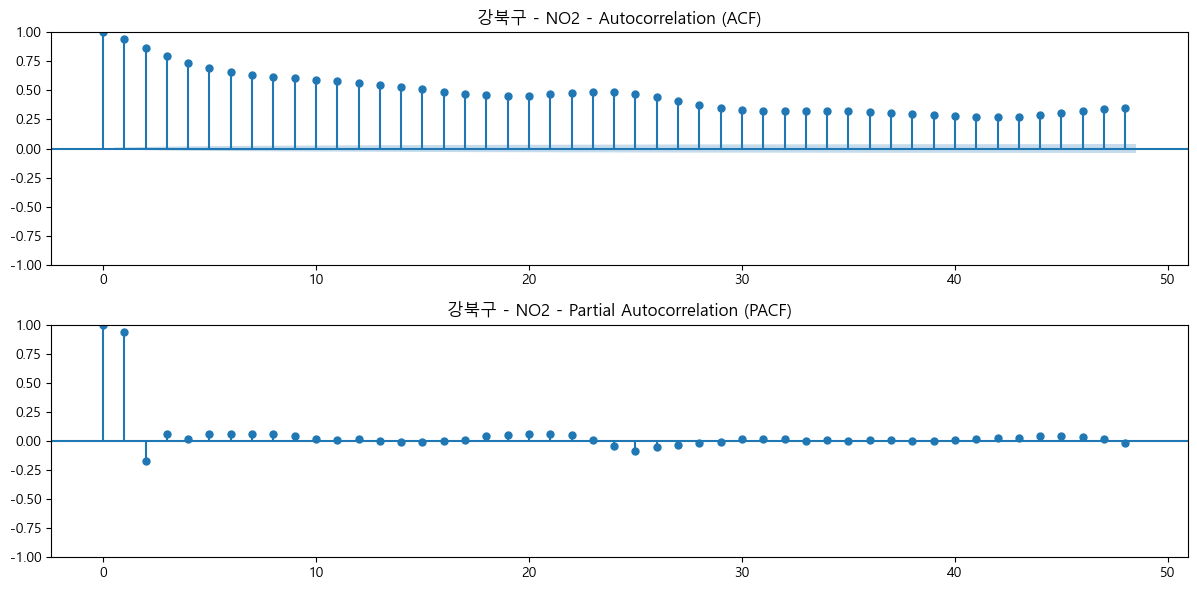

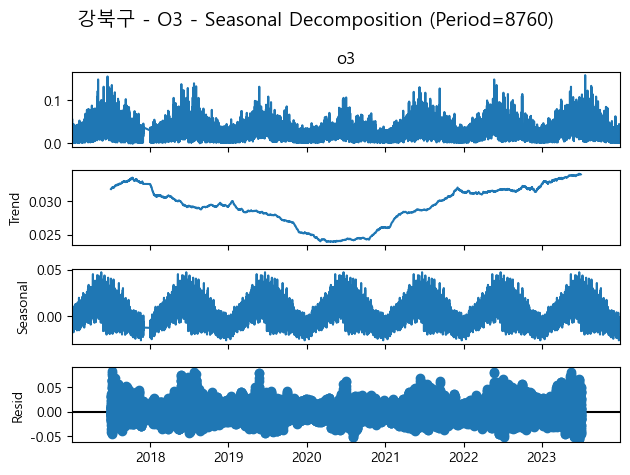

[강북구 - o3] ACF/PACF 분석


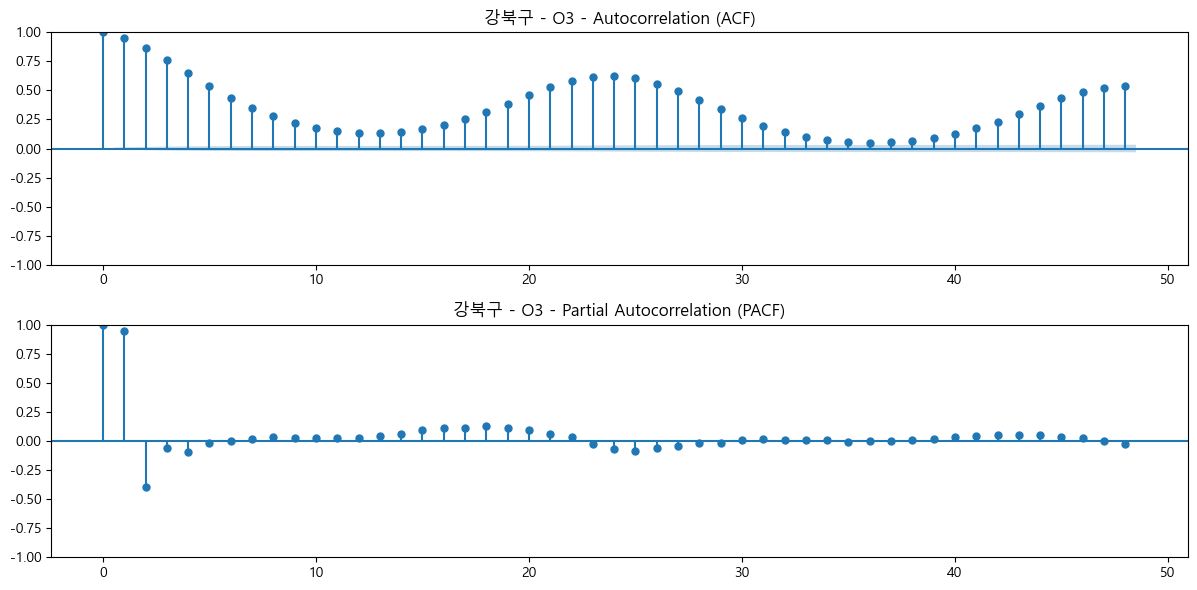


=== 용산구 ===


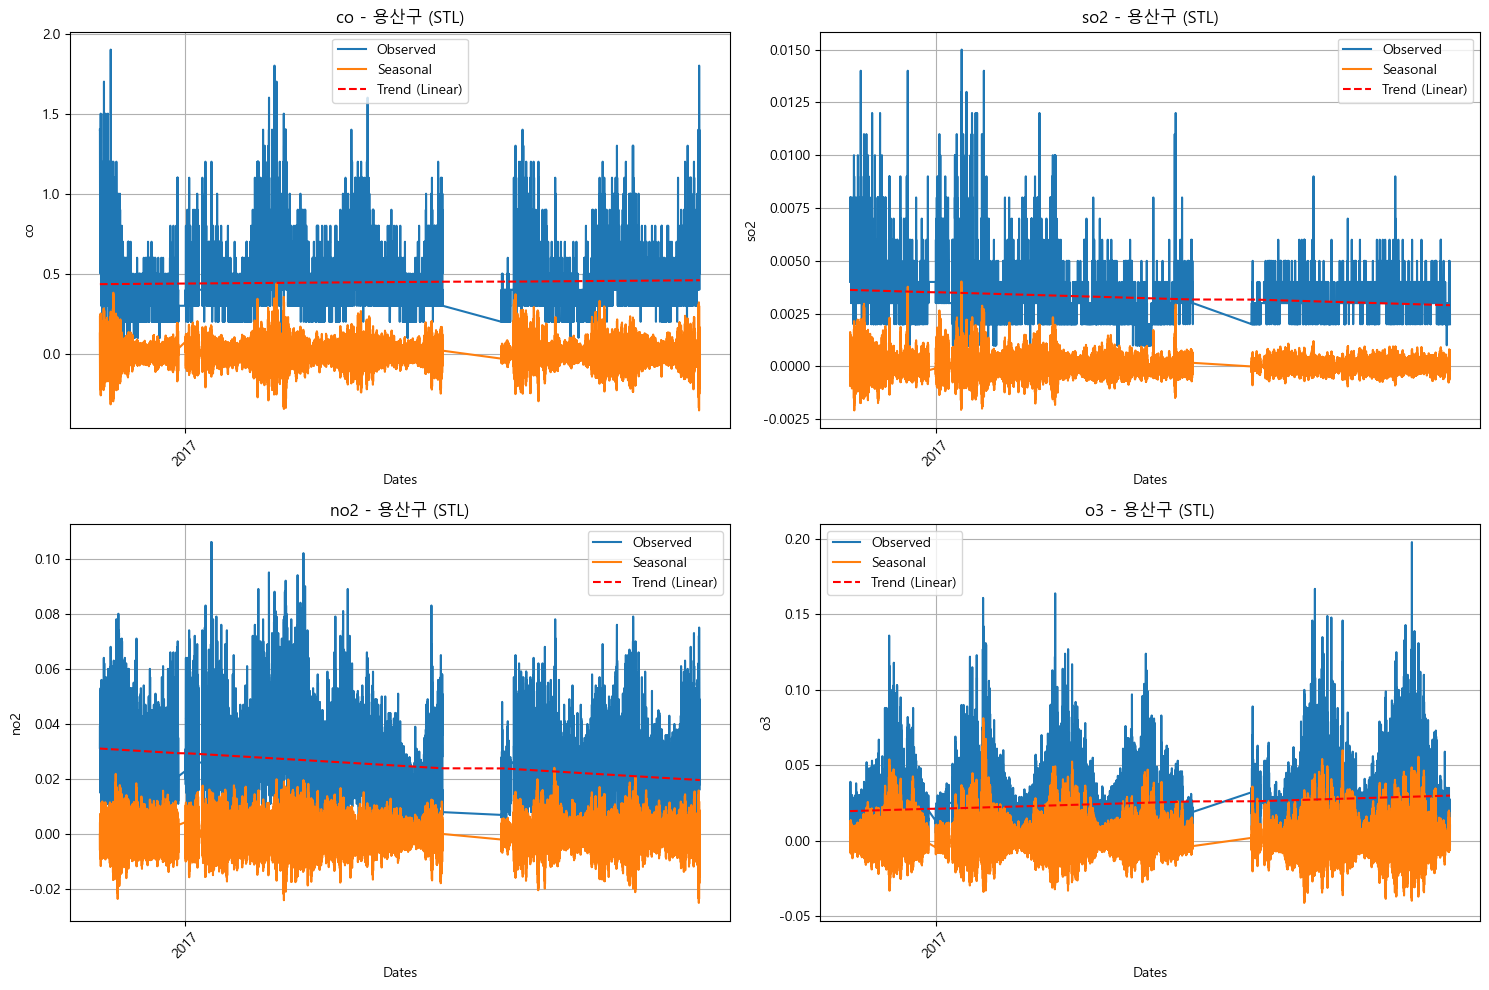

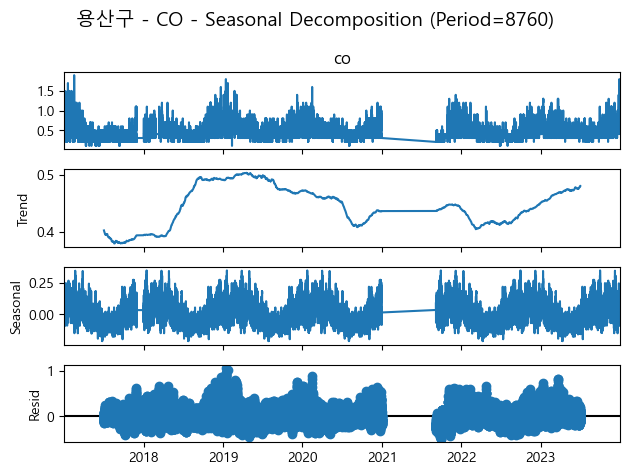

[용산구 - co] ACF/PACF 분석


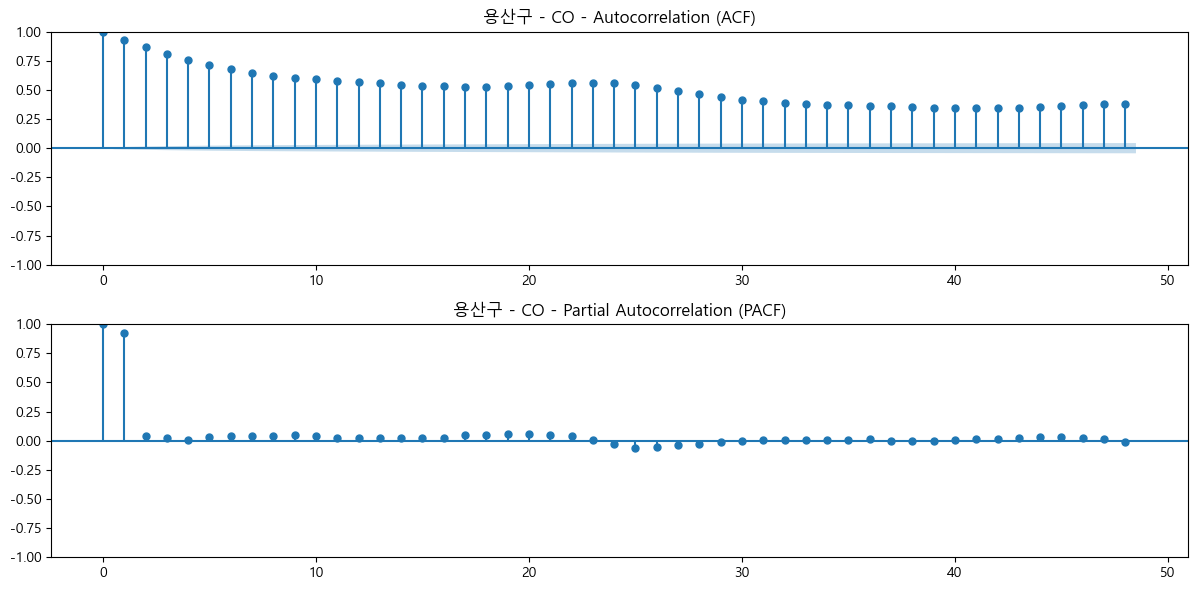

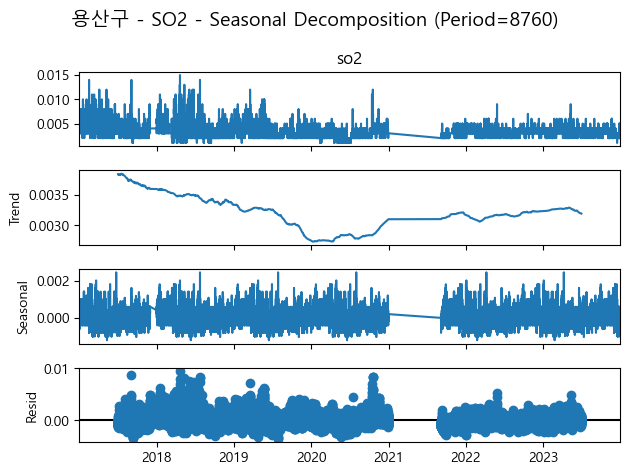

[용산구 - so2] ACF/PACF 분석


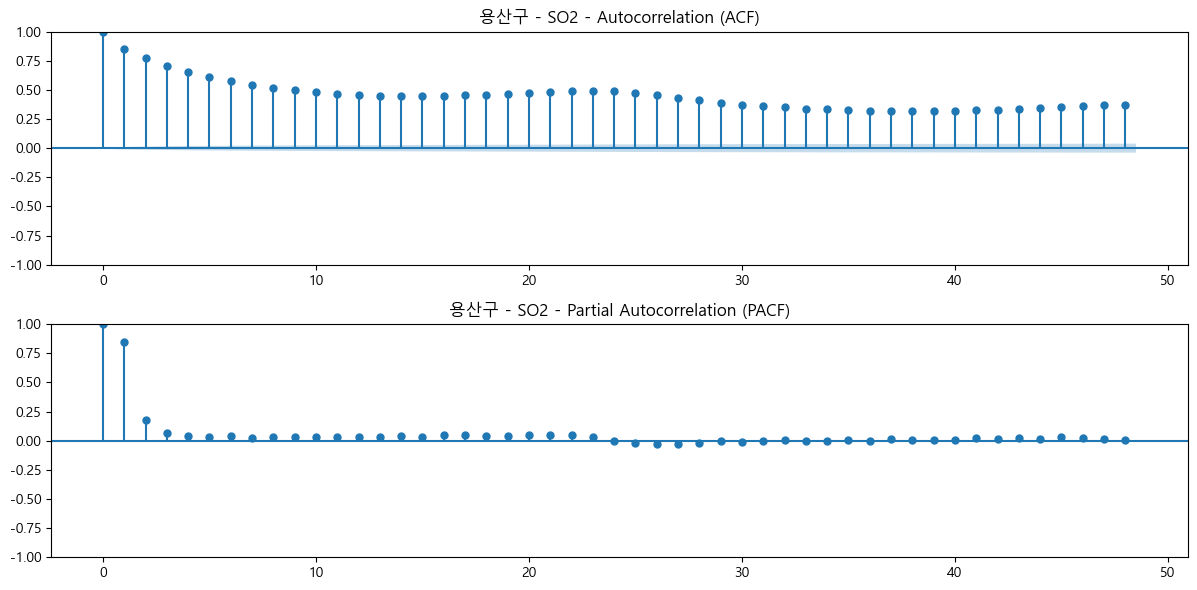

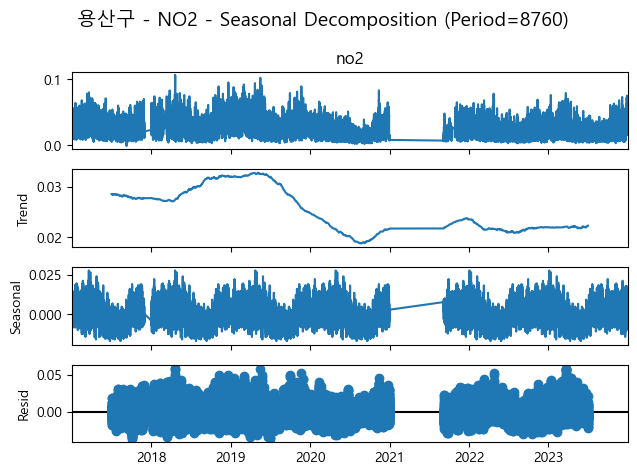

[용산구 - no2] ACF/PACF 분석


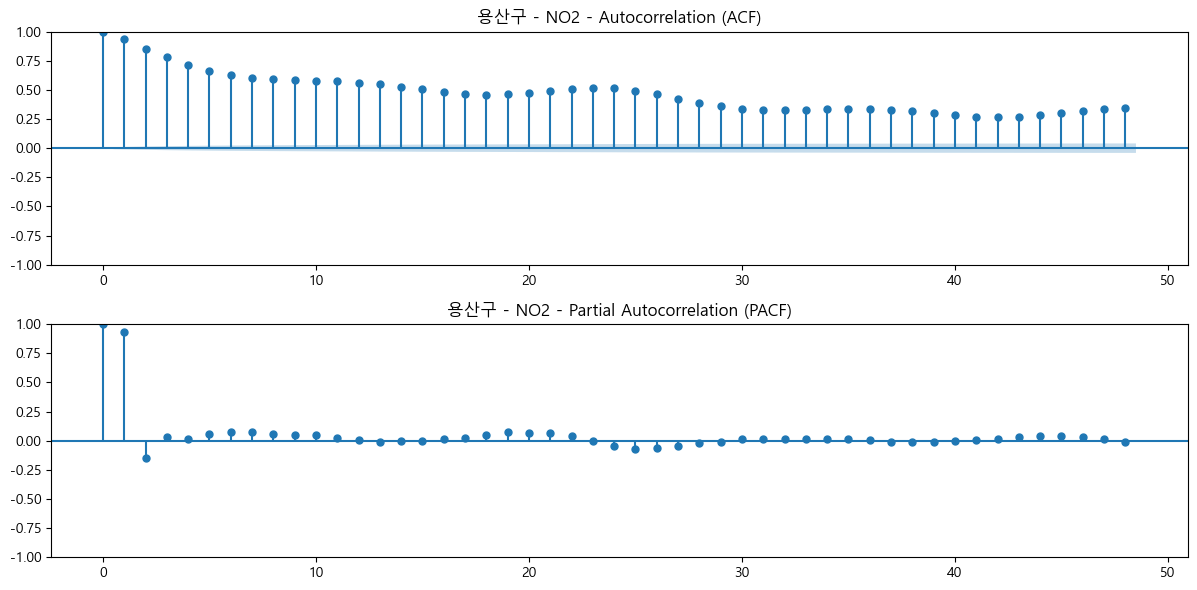

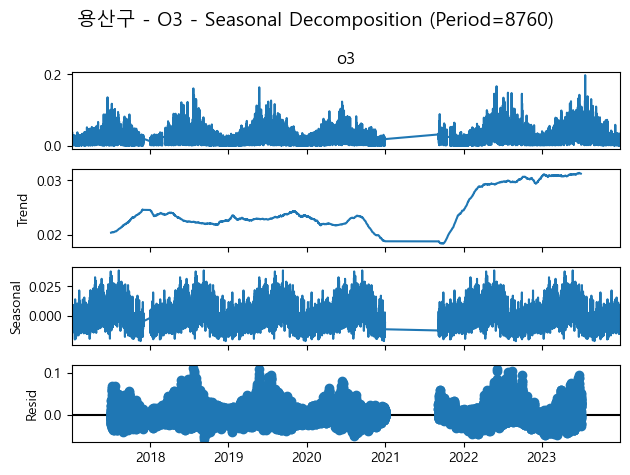

[용산구 - o3] ACF/PACF 분석


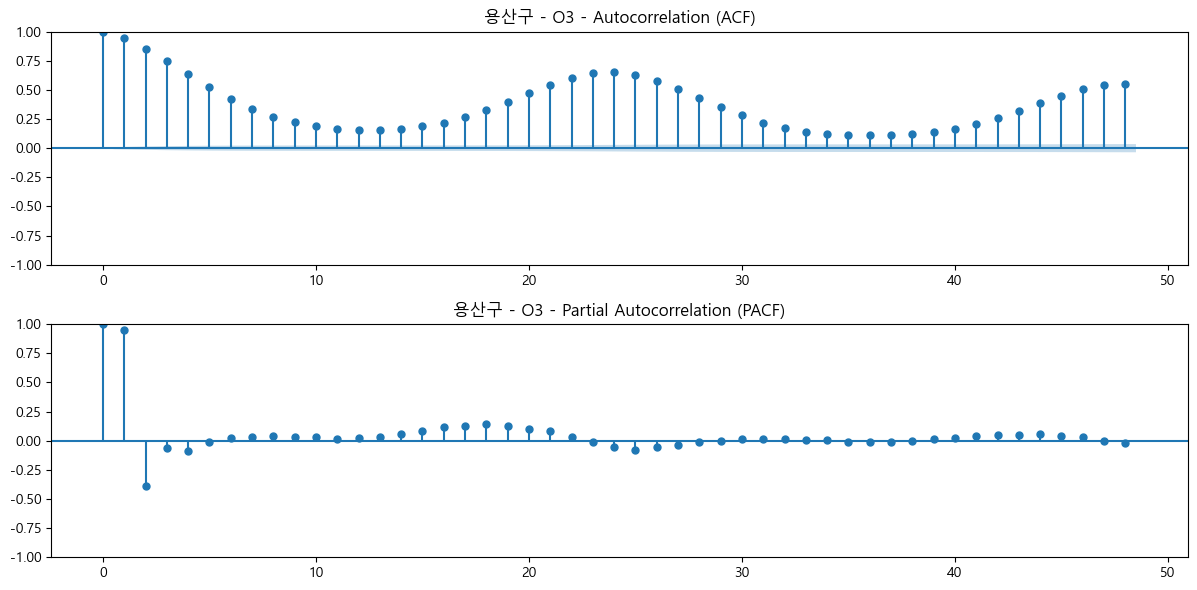

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# 1. datetime 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# 2. 대상 지역 및 대기오염 변수
regions = ['강남구', '강서구', '강동구', '강북구', '용산구']
target_cols = ['co', 'so2', 'no2', 'o3']

# 3. 지역별 반복 분석
for region in regions:
    print(f"\n=== {region} ===")
    df_sub = df[df['region'] == region].copy()
    df_sub = df_sub.set_index('datetime')

    # --- 3-1. STL + 선형회귀 시각화 ---
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(target_cols):
        hourly_series = df_sub[col].resample('h').mean().dropna()
        if len(hourly_series) < 48:
            print(f"[{region} - {col}] STL: 데이터 부족으로 생략")
            continue

        hourly_series.index = hourly_series.index.to_period('h')

        stl = STL(hourly_series, period=24)
        result = stl.fit()

        time_numeric = np.arange(len(result.trend)).reshape(-1, 1)
        linreg = LinearRegression().fit(time_numeric, result.trend)
        trend_linear = linreg.predict(time_numeric)

        ax = axes[i]
        ax.plot(result.observed.index.to_timestamp(), result.observed, label='Observed')
        ax.plot(result.seasonal.index.to_timestamp(), result.seasonal, label='Seasonal')
        ax.plot(result.trend.index.to_timestamp(), trend_linear, label='Trend (Linear)', color='red', linestyle='--')

        ax.set_title(f'{col} - {region} (STL)')
        ax.set_xlabel('Dates')
        ax.set_ylabel(col)
        ax.legend()
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

        # x축 눈금 설정
        xticks = pd.date_range(
            start=hourly_series.index.min().to_timestamp(),
            end=hourly_series.index.max().to_timestamp(),
            freq='20YE'
        )
        ax.set_xticks(xticks)
        ax.set_xticklabels([d.strftime('%Y') for d in xticks])

    plt.tight_layout()
    plt.show()

    # --- 3-2. seasonal_decompose 시각화 ---
    for col in target_cols:
        series = df_sub[col].dropna()

        if len(series) < 2 * 8760:  # 2년 이상 데이터 권장
            print(f"[{region} - {col}] seasonal_decompose: 데이터 부족으로 생략 (데이터 개수: {len(series)})")
            continue

        try:
            result = sm.tsa.seasonal_decompose(series, model='additive', period=8760)
        except ValueError as e:
            print(f"[{region} - {col}] seasonal_decompose 오류: {e}")
            continue

        result.plot()
        plt.suptitle(f"{region} - {col.upper()} - Seasonal Decomposition (Period=8760)", fontsize=14)
        plt.tight_layout()
        plt.show()        
        
        print(f"[{region} - {col}] ACF/PACF 분석")

        fig, ax = plt.subplots(2, 1, figsize=(12, 6))
        
        # ACF
        plot_acf(series, ax=ax[0], lags=48)
        ax[0].set_title(f"{region} - {col.upper()} - Autocorrelation (ACF)")
        
        # PACF
        plot_pacf(series, ax=ax[1], lags=48, method='ywm')  # 안정된 방법 사용
        ax[1].set_title(f"{region} - {col.upper()} - Partial Autocorrelation (PACF)")

        plt.tight_layout()
        plt.show()